# Chapter 2: Large Scale data Analysis with Spacy


## Data structures

### Vocab, Lexemes and StringStore

Welcome back! Now that you've had some real experience using spaCy's objects, it's time for you to learn more about what's actually going on under spaCy's hood.

In this lesson, we'll take a look at the shared vocabulary and how spaCy deals with strings.

**Shared vocab and string store (1)**

spaCy stores all shared data in a vocabulary, the **Vocab**.

This includes words, **but also the labels schemes for tags and entities**.

To save memory, all strings are encoded to hash IDs. If a word occurs more than once, we don't need to save it every time.

Instead, spaCy uses a hash function to generate an ID and stores the string only once in the string store. The string store is available as `nlp.vocab.strings`.

It's a **lookup table that works in both directions**. You can look up a string and get its hash, and look up a hash to get its string value. Internally, spaCy only communicates in hash IDs.

Hash IDs can't be reversed, though. If a word is not in the vocabulary, there's no way to get its string. That's why we always need to pass around the shared vocab.

In [1]:
import spacy

nlp = spacy.blank('en')

nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]

In [2]:
# Raises an error if we haven't seen the string before
string = nlp.vocab.strings[3197928453018144401]

**Shared vocab and string store (2)**

To get the hash for a string, we can look it up in `nlp.vocab.strings`.

To get the string representation of a hash, we can look up the hash.

A `Doc` object also exposes its vocab and strings.

In [3]:
doc = nlp("I love coffee")

print("hash value:", nlp.vocab.strings["coffee"])

print("string value:", nlp.vocab.strings[3197928453018144401])

hash value: 3197928453018144401
string value: coffee


The doc also exposes the vocab and strings

In [4]:
doc = nlp("I love coffee")
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401


**Data structures (1)**

Lexemes are **context-independent** entries in the vocabulary.

You can get a lexeme by looking up a string or a hash ID in the vocab.

Lexemes expose attributes, just like tokens.

**They hold context-independent information about a word**, like the text, or whether the word consists of alphabetic characters.

Lexemes don't have part-of-speech tags, dependencies or entity labels. Those depend on the context.

In [5]:
# A Lexeme object is an entry in the vocabulary
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


- Contains the context-independent information about a word
    - Word text: `lexeme.text` and `lexeme.orth` (the hash)
    - Lexical attributes like `lexeme.is_alpha`
    - Not context-dependent part-of-speech tags, dependencies or entity labels

**Vocab, Hashes and lexemes**

Here's an example.

The Doc contains words in context – in this case, the tokens "I", "love" and "coffee" with their part-of-speech tags and dependencies.

Each token refers to a lexeme, which knows the word's hash ID. To get the string representation of the word, spaCy looks up the hash in the string store.

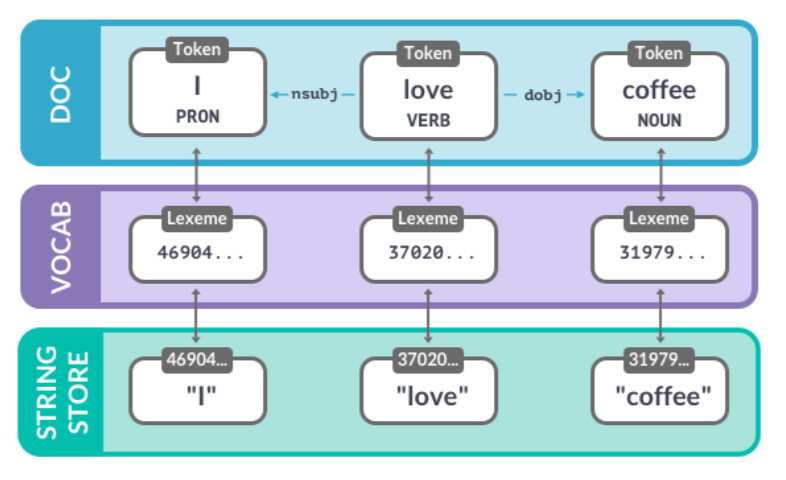

**Strings to hashes**

- Look up the string “cat” in nlp.vocab.strings to get the hash.
- Look up the hash to get back the string.

In [6]:
import spacy

nlp = spacy.blank("en")
doc = nlp("I have a cat")

# Look up the hash for the word "cat"
cat_hash = nlp.vocab.strings["cat"]
print(cat_hash)

# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[cat_hash]
print(cat_string)

5439657043933447811
cat


- Look up the string label “PERSON” in nlp.vocab.strings to get the hash.
- Look up the hash to get back the string.

In [7]:
import spacy

nlp = spacy.blank("en")
doc = nlp("David Bowie is a PERSON")

# Look up the hash for the string label "PERSON"
person_hash = nlp.vocab.strings["PERSON"]
print(person_hash)

# Look up the person_hash to get the string
person_string = nlp.vocab.strings[person_hash]
print(person_string)

380
PERSON


### Data structures 2

#### Doc, Span and Token

Now that you know all about the vocabulary and string store, we can take a look at the most important data structure: the Doc, and its views Token and Span.

**The Doc Object¨**

The `Doc` is one of the central data structures in spaCy. It's created automatically when you process a text with the nlp object. But you can also instantiate the class manually.

After creating the nlp object, we can import the Doc class from spacy.tokens.

Here we're creating a doc from three words. The spaces are a list of boolean values indicating whether the word is followed by a space. Every token includes that information – even the last one!

The Doc class takes three arguments: the **shared vocab**, the **words** and the **spaces**.

In [8]:
# Create an nlp object
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

**The Span Object**

A Span is a slice of a doc consisting of one or more tokens. The `Span` takes at least three arguments: the **doc** it refers to, and the **start** and **end** index of the span. Remember that the end index is exclusive!

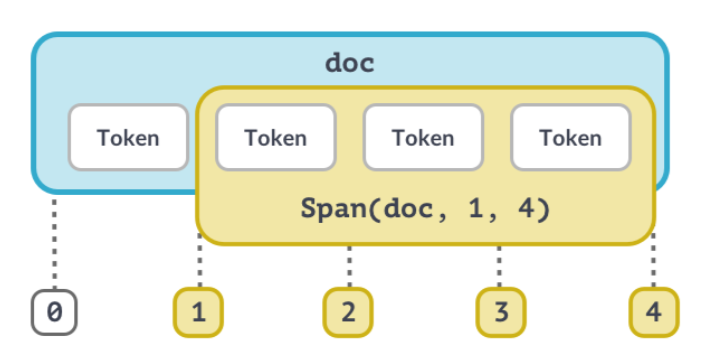

To create a Span manually, we can also import the class from `spacy.tokens`. We can then instantiate it with the doc and the span's start and end index, and an *optional label argument.*

The `doc.ents` are writable, so we can **add entities manually by overwriting it with a list of spans.**

In [9]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

**Best practices**

A few tips and tricks before we get started:

The Doc and Span are very powerful and optimized for performance. They give you access to all references and relationships of the words and sentences.

- If your application needs to output strings, make sure to **convert the doc as late as possible**. If you do it too early, you'll lose all relationships between the tokens.

- To keep things consistent, try to use built-in token attributes wherever possible. For example, token.i for the token index.

- Also, don't forget to always pass in the shared vocab!

**Creating a Doc**

In [10]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ["spaCy", "is", "cool", "!"]
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool!


In [11]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Go, get started!"
words = ["Go", ",", "get", "started", "!"]
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Go, get started!


In [12]:
import spacy

nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Oh, really?!"
words = ["Oh", ",", "really", "?", "!"]
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Oh, really?!


**Docs, spans and entities from scratch**

In this exercise, you’ll create the Doc and Span objects manually, and update the named entities – just like spaCy does behind the scenes. A shared nlp object has already been created.

In [13]:
import spacy

nlp = spacy.blank("en")

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words = words, spaces = spaces)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

I like David Bowie
David Bowie PERSON
[('David Bowie', 'PERSON')]


**Data structures best practices**

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            print("Found proper noun before a verb:", token.text)

Found proper noun before a verb: Berlin


### Word vectors and semantic similarity

**Comparing semantic similarity**

spaCy can compare two objects and predict how similar they are – for example, documents, spans or single tokens.

The Doc, Token and Span objects have a `.similarity` method that takes another object and returns a floating point number **between 0 and 1**, indicating how similar they are.

One thing that's very important: **In order to use similarity, you need a larger spaCy pipeline that has word vectors included.**

For example, the medium or large English pipeline – but not the small one. So if you want to use vectors, always go with a pipeline that ends in "md" or "lg". You can find more details on this in the documentation.

In [15]:
#! python -m spacy download en_core_web_lg

**Similarity examples**

Here's an example. Let's say we want to find out whether two documents are similar.

First, we load the medium English pipeline, `"en_core_web_md"`.

We can then create two doc objects and use the first doc's similarity method to compare it to the second.

Here, a fairly high similarity score of 0.86 is predicted for "I like fast food" and "I like pizza".

The same works for tokens.

According to the word vectors, the tokens "pizza" and "pasta" are kind of similar, and receive a score of 0.7.

In [16]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_lg")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.8627204117787385


In [17]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.7369546294212341


**Similarity examples**

You can also use the `similarity` methods to compare different types of objects.

For example, a document and a token.

Here, the similarity score is pretty low and the two objects are considered fairly dissimilar.

Here's another example comparing a span – "pizza and pasta" – to a document about McDonalds.

The score returned here is 0.61, so it's determined to be kind of similar.

In [18]:
# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

0.32531983166759537


In [19]:
# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.6199092090831612


**How does spaCy predict similarity?**

Similarity is determined using word vectors, multi-dimensional representations of meanings of words.

You might have heard of Word2Vec, which is an algorithm that's often used to train word vectors from raw text.

Vectors can be added to spaCy's pipelines.

By default, the similarity returned by spaCy is the cosine similarity between two vectors – but this can be adjusted if necessary.

Vectors for objects consisting of several tokens, like the Doc and Span, **default to the average of their token vectors**.

That's also why you usually get more value out of shorter phrases with fewer irrelevant words.

**Word vectors in Spacy**

To give you an idea of what those vectors look like, here's an example.

First, we load the medium pipeline again, which ships with word vectors.

Next, we can process a text and look up a token's vector using the .vector attribute.

The result is a 300-dimensional vector of the word "banana".

In [20]:
# Load a larger pipeline with vectors
nlp = spacy.load("en_core_web_lg")

doc = nlp("I have a banana")

# Access the vector via the token.vector attribute
print(doc[3].vector)

[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-02 -2

**Similarity depends on the application context**

Predicting similarity can be useful for many types of applications. For example, to recommend a user similar texts based on the ones they have read. It can also be helpful to flag duplicate content, like posts on an online platform.

However, it's important to keep in mind that there's no objective definition of what's similar and what isn't. **It always depends on the context and what your application needs to do.**

Here's an example: spaCy's default word vectors assign a very high similarity score to "I like cats" and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.


In [21]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.9501447503553421


**Inspecting word vectors**

In this exercise, you’ll use a larger English pipeline, which includes around 20.000 word vectors. The pipeline package is already pre-installed.

- Load the medium "en_core_web_md" pipeline with word vectors.
- Print the vector for "bananas" using the token.vector attribute.

In [23]:
import spacy

# Load the en_core_web_md pipeline
nlp = spacy.load('en_core_web_lg')

# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc.vector
print(bananas_vector)

[ 2.07984239e-01 -2.60890484e-01 -1.15457252e-01 -1.96443751e-01
 -2.83249468e-03  3.55849974e-02 -2.05170006e-01 -2.27374747e-01
  8.56052488e-02  1.36894751e+00 -5.74124977e-02  8.06210041e-02
  2.37275064e-02  1.17454052e-01 -6.53099641e-03 -1.24400005e-01
  1.99086756e-01  6.37722552e-01  1.52916998e-01 -2.33504996e-01
 -2.40909994e-01 -7.11500049e-02 -9.10753161e-02  7.16734976e-02
  1.16262749e-01 -3.91372502e-01  1.13048747e-01 -2.11327493e-01
  1.09019078e-01 -2.44885415e-01  3.00577488e-02  4.77855802e-02
  7.37800002e-02  2.57142037e-01  2.62586236e-01 -1.66897491e-01
  1.87596500e-01 -1.23680010e-02 -1.76299751e-01  1.11685000e-01
  1.82024967e-02  9.86500084e-03 -3.58770013e-01 -2.23265499e-01
 -4.37720008e-02  3.63999486e-01  7.42954984e-02  1.21225506e-01
  1.37013003e-01 -5.50666526e-02  2.66017504e-02  8.87180045e-02
 -1.14092499e-01 -2.02865750e-01  3.63092512e-01 -3.08394760e-01
  1.13859497e-01  3.13650146e-02  2.62076259e-01  1.90399922e-02
  7.24634901e-02  2.79004

**Comparing similarities**

In this exercise, you’ll be using spaCy’s `similarity` methods to compare `Doc`, `Token` and `Span` objects and get similarity scores.

_Use the doc.similarity method to compare doc1 to doc2 and print the result._

In [25]:
import spacy

nlp = spacy.load("en_core_web_lg")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.8789265574516525


_Use the token.similarity method to compare token1 to token2 and print the result._

In [27]:
import spacy

nlp = spacy.load("en_core_web_lg")

doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books"
similarity = token1.similarity(token2)
print(similarity)

0.2232533097267151


- Create spans for “great restaurant”/“really nice bar”.
- Use span.similarity to compare them and print the result.


In [28]:
import spacy

nlp = spacy.load("en_core_web_lg")

doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[-4:-1]

# Get the similarity 
similarity = span1.similarity(span2)
print(similarity)

0.7517392635345459


#### Combining predictions and rules

Combining predictions from statistical models with rule-based systems is one of the most powerful tricks you should have in your NLP toolbox.

In this lesson, we'll take a look at how to do it with spaCy.

**Statistical models**

Statistical models are useful if your application needs to be able to **generalize based on a few examples**.

For instance, detecting product or person **names usually benefits from a trained model**. Instead of providing a list of all person names ever, your application will be able to predict whether a span of tokens is a person name. Similarly, you can predict **dependency labels** to find subject/object relationships.

To do this, you would use spaCy's entity recognizer, dependency parser or part-of-speech tagger.

**Rules**

Rule-based approaches on the other hand come in handy if there's a more or less **finite number of instances you want to find**. For example, all countries or cities of the world, drug names or even dog breeds.

In spaCy, you can achieve this with custom tokenization rules, as well as the matcher and phrase matcher.


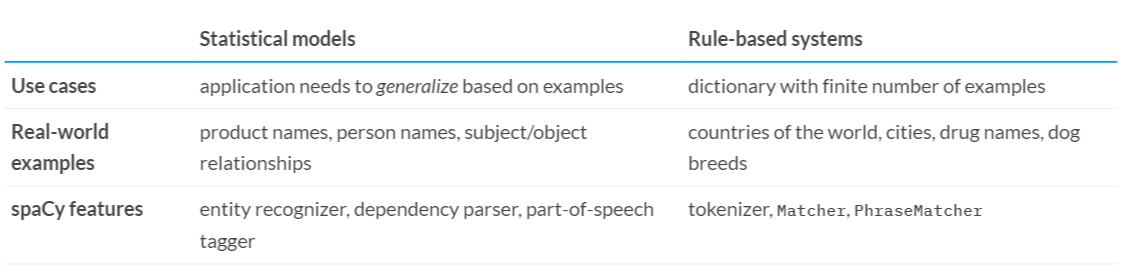

**Recap: Rule-based matching**

In the last chapter, you learned how to use spaCy's rule-based matcher to find complex patterns in your texts. Here's a quick recap.

The matcher is initialized with the shared vocabulary – usually `nlp.vocab`.

Patterns are lists of dictionaries, and each dictionary describes **one token and its attributes**. Patterns can be added to the matcher using the matcher.add method.

Operators let you specify how often to match a token. For example, "+" will match one or more times.

Calling the matcher on a doc object will return a list of the matches. Each match is a tuple consisting of an ID, and the start and end token index in the document.

In [30]:
# Initialize with the shared vocab
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{"LEMMA": "love", "POS": "VERB"}, {"LOWER": "cats"}]
matcher.add("LOVE_CATS", [pattern])

# Operators can specify how often a token should be matched
pattern = [{"TEXT": "very", "OP": "+"}, {"TEXT": "happy"}]
matcher.add("VERY_HAPPY", [pattern])

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very very happy")
matches = matcher(doc)

matches

[(9137535031263442622, 1, 3),
 (2447047934687575526, 7, 9),
 (2447047934687575526, 6, 9)]

**Adding statistical predictions**

Here's an example of a matcher rule for "golden retriever".

If we iterate over the matches returned by the matcher, we can get the match ID and the start and end index of the matched span. We can then find out more about it. Span objects give us access to the original document and all other token attributes and linguistic features predicted by a model.

For example, we can get the span's root token. If the span consists of more than one token, this will be the token that decides the category of the phrase. For example, the root of "Golden Retriever" is "Retriever". We can also find the head token of the root. This is the syntactic "parent" that governs the phrase – in this case, the verb "have".

Finally, we can look at the previous token and its attributes. In this case, it's a determiner, the article "a".

In [31]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", [[{"LOWER": "golden"}, {"LOWER": "retriever"}]])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


**Combining predictions and rules**

The phrase matcher is another helpful tool to find sequences of words in your data.

It performs a keyword search on the document, but instead of only finding strings, **it gives you direct access to the tokens in context**.

It takes Doc objects as patterns.

It's also really fast.

This makes it very useful for matching large dictionaries and word lists on large volumes of text.

Here's an example.

The phrase matcher can be imported from spacy.matcher and follows the same API as the regular matcher.

**Instead of a list of dictionaries, we pass in a Doc object as the pattern.**

We can then iterate over the matches in the text, which gives us the match ID, and the start and end of the match. This lets us create a Span object for the matched tokens "Golden Retriever" to analyze it in context.

In [32]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", [pattern])
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: Golden Retriever


**Debugging patterns**

Why does this pattern not match the tokens “Silicon Valley” in the doc?

In [33]:
pattern = [{"LOWER": "silicon"}, {"TEXT": " "}, {"LOWER": "valley"}]

In [34]:
doc = nlp("Can Silicon Valley workers rein in big tech from within?")

**Ans:** The tokenizer doesn’t create tokens for single spaces, so there’s no token with the value " " in between.

Both patterns in this exercise contain mistakes and won’t match as expected. Can you fix them? If you get stuck, try printing the tokens in the doc to see how the text will be split and adjust the pattern so that each dictionary represents one token.

- Edit `pattern1` so that it correctly matches all case-insensitive mentions of "Amazon" plus a title-cased proper noun.
- Edit `pattern2` so that it correctly matches all case-insensitive mentions of "ad-free", plus the following noun.

In [42]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad"}, {'TEXT': '-'}, {'LOWER': 'free'}, {'POS':'NOUN'}] #-free"}]#, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", [pattern1])
matcher.add("PATTERN2", [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


**Efficient phrase matching**

Sometimes it’s more efficient to match exact strings instead of writing patterns describing the individual tokens. This is especially true for finite categories of things – like all countries of the world. We already have a list of countries, so let’s use this as the basis of our information extraction script. A list of string names is available as the variable `COUNTRIES`.

- Import the `PhraseMatcher` and initialize it with the shared vocab as the variable matcher.
- Add the phrase patterns and call the matcher on the doc.

In [46]:
import json
import spacy

#with open("exercises/en/countries.json", encoding="utf8") as f:
#    COUNTRIES = json.loads(f.read())
COUNTRIES = ['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 
             'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 
             'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)', 
             'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 
             'British Indian Ocean Territory', 'United States Minor Outlying Islands', 'Virgin Islands (British)', 'Virgin Islands (U.S.)', 
             'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands', 
             'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 
             'Congo', 'Congo (Democratic Republic of the)', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 
             'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 
             'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 
             'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 
             'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana',
             'Haiti', 'Heard Island and McDonald Islands', 'Holy See', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 
             "Côte d'Ivoire", 'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey',
             'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 
             'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia (the former Yugoslav Republic of)',
             'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 
             'Mayotte', 'Mexico', 'Micronesia (Federated States of)', 'Moldova (Republic of)', 'Monaco', 'Mongolia', 'Montenegro', 
             'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 
             'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', "Korea (Democratic People's Republic of)", 'Northern Mariana Islands',
             'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine, State of', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 
             'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Kosovo', 'Réunion', 'Romania', 'Russian Federation', 
             'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 
             'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 
             'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 
             'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 
             'Korea (Republic of)', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 
             'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 
             'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine',
             'United Arab Emirates', 'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Uruguay', 'Uzbekistan', 
             'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe']

nlp = spacy.blank("en")
doc = nlp("Czech Republic may help Slovakia protect its airspace")

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Czech Republic, Slovakia]


**Extracting countries and relationships**

In the previous exercise, you wrote a script using spaCy’s `PhraseMatcher` to find country names in text. Let’s use that country matcher on a longer text, analyze the syntax and update the document’s entities with the matched countries.

- Iterate over the matches and create a Span with the label "GPE" (geopolitical entity).
- Overwrite the entities in doc.ents and add the matched span.
- Get the matched span’s root head token.
- Print the text of the head token and the span.

In [50]:
TEXT = "After the Cold War, the UN saw a radical expansion in its peacekeeping duties, taking on more missions in ten years than it had in the previous four decades.Between 1988 and 2000, the number of adopted Security Council resolutions more than doubled, and the peacekeeping budget increased more than tenfold. The UN negotiated an end to the Salvadoran Civil War, launched a successful peacekeeping mission in Namibia, and oversaw democratic elections in post-apartheid South Africa and post-Khmer Rouge Cambodia. In 1991, the UN authorized a US-led coalition that repulsed the Iraqi invasion of Kuwait. Brian Urquhart, Under-Secretary-General from 1971 to 1985, later described the hopes raised by these successes as a 'false renaissance' for the organization, given the more troubled missions that followed. Though the UN Charter had been written primarily to prevent aggression by one nation against another, in the early 1990s the UN faced a number of simultaneous, serious crises within nations such as Somalia, Haiti, Mozambique, and the former Yugoslavia. The UN mission in Somalia was widely viewed as a failure after the US withdrawal following casualties in the Battle of Mogadishu, and the UN mission to Bosnia faced 'worldwide ridicule' for its indecisive and confused mission in the face of ethnic cleansing. In 1994, the UN Assistance Mission for Rwanda failed to intervene in the Rwandan genocide amid indecision in the Security Council. Beginning in the last decades of the Cold War, American and European critics of the UN condemned the organization for perceived mismanagement and corruption. In 1984, the US President, Ronald Reagan, withdrew his nation's funding from UNESCO (the United Nations Educational, Scientific and Cultural Organization, founded 1946) over allegations of mismanagement, followed by Britain and Singapore. Boutros Boutros-Ghali, Secretary-General from 1992 to 1996, initiated a reform of the Secretariat, reducing the size of the organization somewhat. His successor, Kofi Annan (1997–2006), initiated further management reforms in the face of threats from the United States to withhold its UN dues. In the late 1990s and 2000s, international interventions authorized by the UN took a wider variety of forms. The UN mission in the Sierra Leone Civil War of 1991–2002 was supplemented by British Royal Marines, and the invasion of Afghanistan in 2001 was overseen by NATO. In 2003, the United States invaded Iraq despite failing to pass a UN Security Council resolution for authorization, prompting a new round of questioning of the organization's effectiveness. Under the eighth Secretary-General, Ban Ki-moon, the UN has intervened with peacekeepers in crises including the War in Darfur in Sudan and the Kivu conflict in the Democratic Republic of Congo and sent observers and chemical weapons inspectors to the Syrian Civil War. In 2013, an internal review of UN actions in the final battles of the Sri Lankan Civil War in 2009 concluded that the organization had suffered 'systemic failure'. One hundred and one UN personnel died in the 2010 Haiti earthquake, the worst loss of life in the organization's history. The Millennium Summit was held in 2000 to discuss the UN's role in the 21st century. The three day meeting was the largest gathering of world leaders in history, and culminated in the adoption by all member states of the Millennium Development Goals (MDGs), a commitment to achieve international development in areas such as poverty reduction, gender equality, and public health. Progress towards these goals, which were to be met by 2015, was ultimately uneven. The 2005 World Summit reaffirmed the UN's focus on promoting development, peacekeeping, human rights, and global security. The Sustainable Development Goals were launched in 2015 to succeed the Millennium Development Goals. In addition to addressing global challenges, the UN has sought to improve its accountability and democratic legitimacy by engaging more with civil society and fostering a global constituency. In an effort to enhance transparency, in 2016 the organization held its first public debate between candidates for Secretary-General. On 1 January 2017, Portuguese diplomat António Guterres, who previously served as UN High Commissioner for Refugees, became the ninth Secretary-General. Guterres has highlighted several key goals for his administration, including an emphasis on diplomacy for preventing conflicts, more effective peacekeeping efforts, and streamlining the organization to be more responsive and versatile to global needs."

In [51]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

#with open("exercises/en/countries.json", encoding="utf8") as f:
#    COUNTRIES = json.loads(f.read())
#with open("exercises/en/country_text.txt", encoding="utf8") as f:
#    TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label='GPE')

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

in --> Namibia
in --> South Africa
Africa --> Cambodia
of --> Kuwait
as --> Somalia
Somalia --> Haiti
Haiti --> Mozambique
in --> Somalia
for --> Rwanda
Britain --> Singapore
War --> Sierra Leone
of --> Afghanistan
invaded --> Iraq
in --> Sudan
of --> Congo
earthquake --> Haiti
[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('Cambodia', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Mozambique', 'GPE'), ('Somalia', 'GPE'), ('Rwanda', 'GPE'), ('Singapore', 'GPE'), ('Sierra Leone', 'GPE'), ('Afghanistan', 'GPE'), ('Iraq', 'GPE'), ('Sudan', 'GPE'), ('Congo', 'GPE'), ('Haiti', 'GPE')]
